# Giriş


<div style="color:black;
           display:fill;
           border-radius:8px;
           background-color:#d3dcec;
           font-size:130%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 15px;">
    Bu notebookta, Medical Cost Personal Veri Seti incelenmiştir. Verilen değişkenlere göre bir kişinin sağlık sigorta masrafının yaklaşık ne kadar olacağı tahmin edilmeye çalışılmıştır.  
    

    
    
</p>
</div>

***Veri Seti Linki:*** [**Medical Cost Personal Datasets**](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)
<font color = "darkgreen">
    


## 1. Description of Features in the Dataset

## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as lines
import plotly.express as px
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency, f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from warnings import filterwarnings
filterwarnings("ignore")

## 3. Data Overview

### 3.1 Data Import

In [2]:
data = pd.read_csv('Datasets/insurance.csv')
dataCopy = data.copy()
dataCopy

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 3.2 Descriptive Statistics Values

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### 3.3 Missing Value Check

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 4. Exploratory Data Analysis

### 4.1 Numeric Variable Distribution

In [5]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
def numericValDist():
    """
    Function showing bar graph of numerical data.
    """
    gs = gridspec.GridSpec(2, 2)

    fig = plt.figure(figsize=(12, 6))

    fig.text(0.09, 1.05, 'Numeric variable distribution', fontsize=15, fontweight='bold', fontfamily='serif')
    fig.text(0.09, 0.95, """We can say that the Charges and Children variables are exponentially distributed. 
We see that the BMI variable is in accordance with the Normal distribution, and the Age variable is in the normal distribution course.""", fontsize=12, fontweight='light', fontfamily='serif')

    ax1 = fig.add_subplot(gs[0, 0])
    ax1 = sns.distplot(dataCopy["age"],color='#244747',hist_kws=dict(edgecolor="black", linewidth=1,alpha=0.8))

    ax2 = fig.add_subplot(gs[0, 1]) 
    ax2 = sns.distplot(dataCopy["bmi"],color='#244747',hist_kws=dict(edgecolor="black", linewidth=1,alpha=0.8))

    ax3 = fig.add_subplot(gs[1, 0])
    ax3 = sns.distplot(dataCopy["children"],color='#244747',hist_kws=dict(edgecolor="black", linewidth=1,alpha=0.8))

    ax4 = fig.add_subplot(gs[1, 1])
    ax4 = sns.distplot(dataCopy["charges"],color='#244747',hist_kws=dict(edgecolor="black", linewidth=1,alpha=0.8))
    
    sns.despine()

    plt.subplots_adjust(wspace=0.5, hspace=0.5) 

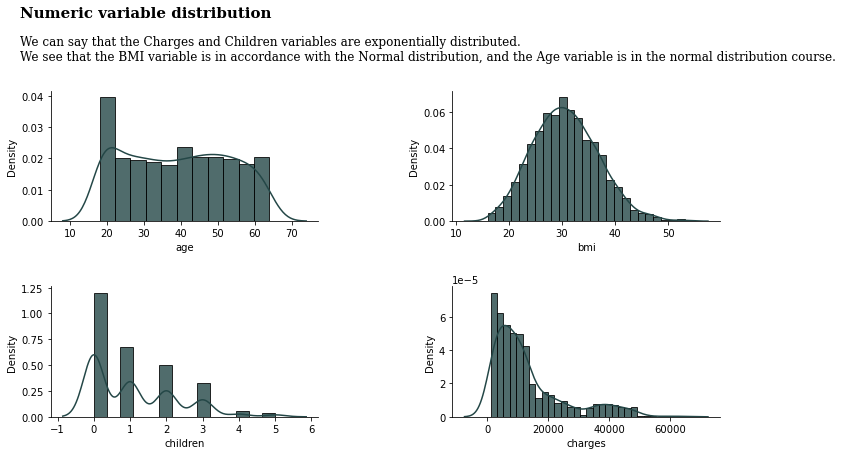

In [7]:
numericValDist()

**Let's take a closer look at the distribution of variables**

 Let's make a hypothesis and find and evaluate the `P-Value with the Kolmogorov-Smirnov` test to see if the variables are normally distributed
 
* __H0:__ The variable has a normal distribution. `p-value > 0.05`
* __H1:__ The variable does not have a normal distribution. `p-value < 0.05`


In [8]:
def kolmogorovSmirnovTest():
    # Kolmogorov–Smirnov test
    age = dataCopy.age
    bmi = dataCopy.bmi
    children = dataCopy.children
    charges = dataCopy.charges

    age_kstest = stats.kstest(age, 'norm',args=(age.mean(),age.std()))
    bmi_kstest = stats.kstest(bmi, 'norm',args=(bmi.mean(),bmi.std()))
    children_kstest = stats.kstest(children, 'norm',args=(children.mean(),children.std()))
    charges_kstest = stats.kstest(charges, 'norm',args=(charges.mean(),charges.std()))

    print(f"""Age\nT: {age_kstest[0]} P-value: {round(age_kstest[1],5)}\nBmi\nT: {bmi_kstest[0]} P-value: {round(bmi_kstest[1],5)} 
Children\nT: {children_kstest[0]} P-value: {round(children_kstest[1],5)}\nCharges\nT: {charges_kstest[0]} P-value: {round(charges_kstest[1],5)}""")


In [9]:
kolmogorovSmirnovTest()

Age
T: 0.07894454646849675 P-value: 0.0
Bmi
T: 0.026099881197044095 P-value: 0.31628 
Children
T: 0.24713178382789813 P-value: 0.0
Charges
T: 0.18846450965981876 P-value: 0.0


* For the `BMI` variable, `H0 is accepted (0.31628>0.05)`. In other words, __we can say that statistically the BMI variable fits the normal distribution.__

__Note:__ As it is known, in ML models, the normal distribution of the data leads to better results. In this case, there is no need to perform any normalization operation on the BMI variable, while normalization can be performed for other variables.

### 4.2 Relationship Between Numeric Variables

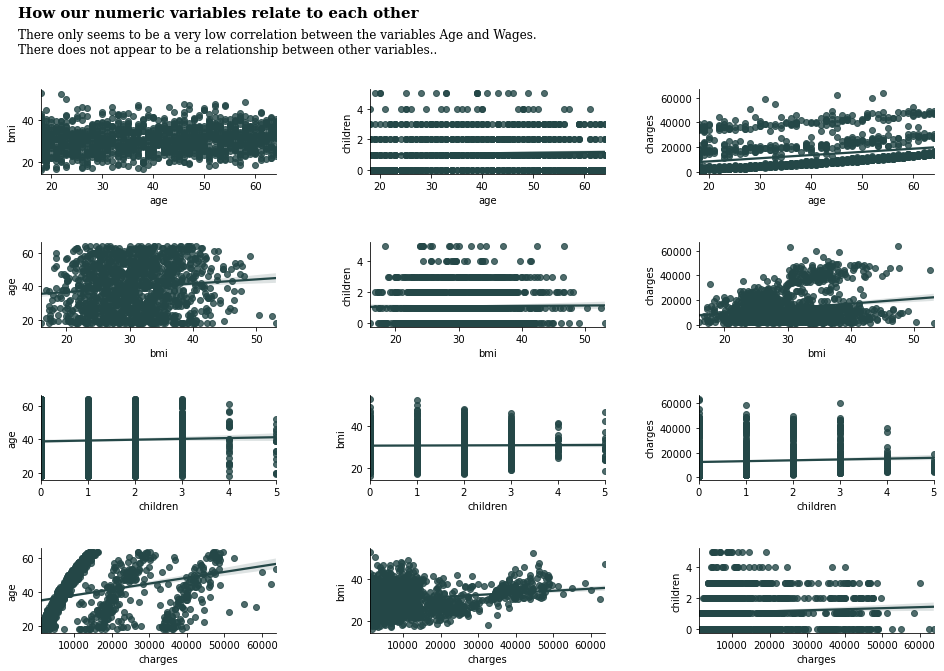

In [10]:
fig = plt.figure(figsize=(16,10))
# Title and sub-title
fig.text(0.105, .98, 'How our numeric variables relate to each other', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, .93, """There only seems to be a very low correlation between the variables Age and Wages.
There does not appear to be a relationship between other variables..""", fontsize=12, fontweight='light', fontfamily='serif')

n = 0 

for x in ['age' , 'bmi' , 'children','charges']:
    for y in ['age' , 'bmi' , 'children','charges']:
        if x==y: continue

        n += 1
        plt.subplot(4 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataCopy,color='#244747')
        sns.despine()
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.8) # useful for adjusting space between subplot

plt.show()

**Let's examine the relationship between Age-Charges variables according to the R-squared value.**

In [11]:
xAge = sm.add_constant(dataCopy[["age"]])
yCharges = dataCopy['charges']

modelAC = sm.OLS(yCharges,xAge)
modelFitAC = modelAC.fit()
modelFitAC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           4.89e-29
Time:                        18:01:02   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`The R-squared value is the success of the independent variable in explaining the variability in the dependent variable. In other words, the Age variable can explain approximately` __9%__ `of the variability in the Charges variable.`

### 4.3 Examining Correlation

In [12]:
def corelation(data):
    
    df = data.copy()
    #Let's use LabelEncoder to convert categorical data.
    for col in df.select_dtypes(include=['object']).columns.to_list():
        df[col] = LabelEncoder().fit_transform(data[col])
    
    cor = df.corr()

    mask = np.zeros_like(cor)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 1, figsize=(15, 10))

        colors = ["#9b1b30","#b6b4b3", "#244747","#09477d"]
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
        sns.heatmap(cor, 
                square=True, 
                mask=mask,
                linewidth=0.5, 
                vmax=0.4, vmin=-0.4, 
                cmap=cmap, 
                cbar=False, 
                ax=ax,annot=True,
                annot_kws = {'size':10},fmt='.3f')

        ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=12)

        ax.spines['top'].set_visible(True)

        fig.text(0.97, 0.97, 'Correlation', fontweight='bold', fontfamily='serif', fontsize=18, ha='right')    

        fig.text(0.97, 0.95, '''
        There is a high positive correlation between 
        Smoker and Charges.In other words, we can say
        that a patient's smoking increases the Charges value.
        
        We can say that there is a low positive correlation
        between Age and Charges.
        ''', 
                 fontweight='light', fontfamily='serif', fontsize=18, va='top', ha='right') 

        plt.tight_layout()
        plt.show()

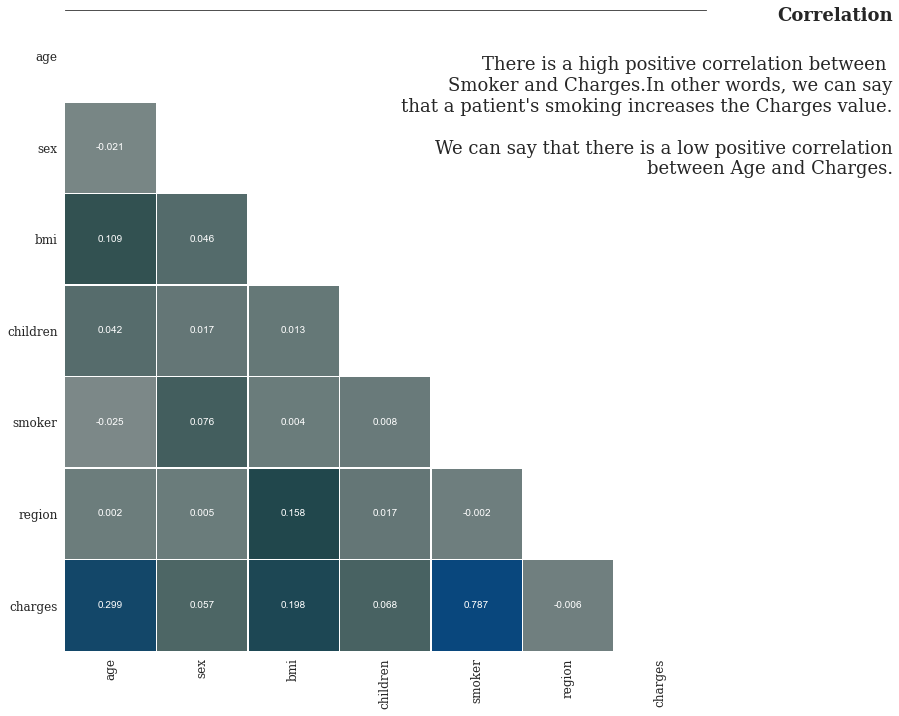

In [13]:
corelation(data)

`Let's display the high relationship between Smoker and Changes with the Scatter chart.`

In [14]:
def visualizationSmoker():
    sns.set(font_scale=1.2)
    sns.set_style("whitegrid")

    fig,ax = plt.subplots(1,1,figsize=(12, 7))

    ax = sns.scatterplot(data=data, x=data.index, y='charges', hue='smoker')
    ax.set_title("Charges - Smoker Graph",fontweight='bold', fontfamily='serif')
    ax.set_xlabel("Index",fontweight='light', fontfamily='serif')
    ax.set_ylabel("Charges",fontweight='light', fontfamily='serif')

    sns.despine()

    #--Anova Analysis
    CategoryGroupLists=dataCopy.groupby('smoker')['charges'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    # useful for adjusting space between subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3) 

    fig.text(0.09, 1, 'Relationship between Smoker and Changes', fontsize=16, fontweight='bold', fontfamily='serif')
    fig.text(1.020, 0.955, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

    fig.text(1.020, 0.600, f'''
    As seen in the scatter plot, non-smokers' charges are 
    much lower than those of smokers.

    Let's check with Analysis of Variance:

        H0: The variables are not related to each other.
        H1: The variables are interrelated.(p-value < 0.05)

    The p-value as a result of the Analysis of Variance: {round(AnovaResults[1],5)}
    In this case, H0 is rejected.
    ''', fontsize=13, fontweight='light', fontfamily='serif')

    l1 = lines.Line2D([1.00, 1.00], [0, 1.00], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
    fig.lines.extend([l1])

    plt.show()

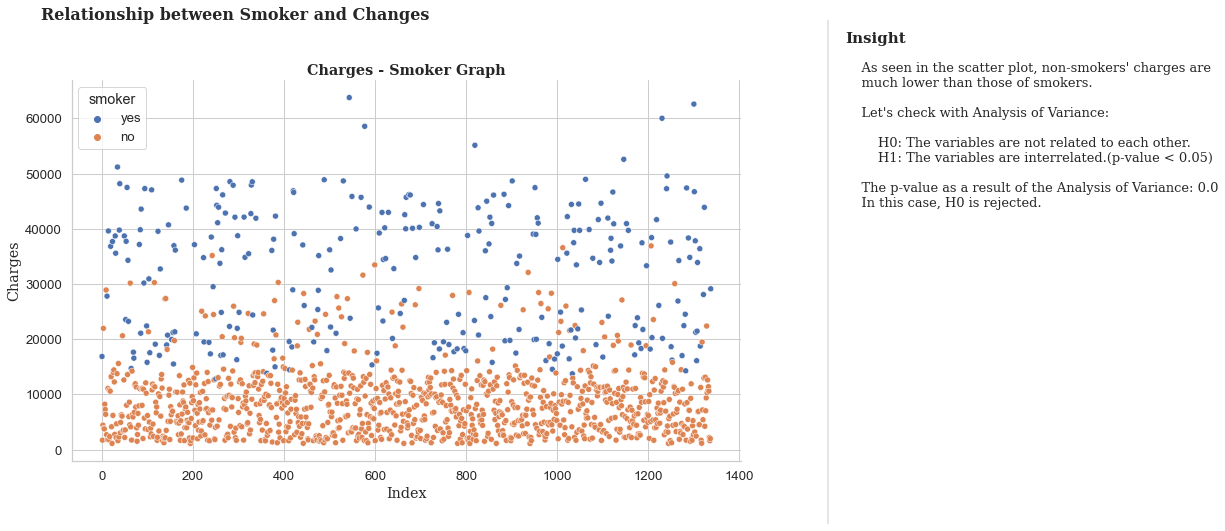

In [15]:
visualizationSmoker()

### 4.4 Examination of Sex Feature

In [16]:
def sexRatio(data):
    """
    Function that visualizes sex distribution
    """
        
    sexRatio = pd.DataFrame(((data["sex"].value_counts()/len(data))).round(2)).T

    fig, ax = plt.subplots(1,1,figsize=(10, 2), dpi=75)

    ax.barh(sexRatio.index, sexRatio["male"], color='#244747', alpha=0.7, label='male')
    ax.barh(sexRatio.index, sexRatio['female'], left=sexRatio['male'], color='#91b8bd', alpha=0.7, label='female')

    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # male-female percentage
    for i in sexRatio.index:
        ax.annotate(f"{int(sexRatio['male'][i]*100)}%", 
                       xy=(sexRatio['male'][i]/2, i),
                       va = 'center', ha='center',fontsize=50, fontweight='light', fontfamily='serif',
                       color='white')

        ax.annotate("Male", 
                       xy=(sexRatio['male'][i]/2, -0.25),
                       va = 'center', ha='center',fontsize=14, fontweight='light', fontfamily='serif',
                       color='white')

        ax.annotate(f"{int(sexRatio['female'][i]*100)}%", 
                   xy=(sexRatio['male'][i]+sexRatio['female'][i]/2, i),
                   va = 'center', ha='center',fontsize=50, fontweight='light', fontfamily='serif',
                   color='#244747')
        ax.annotate("Female", 
                       xy=(sexRatio['male'][i]+sexRatio['female'][i]/2, -0.25),
                       va = 'center', ha='center',fontsize=14, fontweight='light', fontfamily='serif',
                       color='#244747')

    # Title & Subtitle
    fig.text(0.125,1.03,'Male & Female Distribution', fontfamily='serif',fontsize=15, fontweight='bold')
    fig.text(0.125,0.92,'We see a fairly even split.',fontfamily='serif',fontsize=12)  

    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)


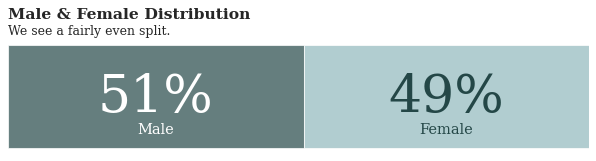

In [17]:
sexRatio(dataCopy)

So we have a fairly even split.

Does the split vary by age? Let's examine..

In [18]:
def ageSexDistribution():
    """
    Function to visualize gender-age distribution.
    """
    def ageBand(num):
        for i in range(1, 100):
            if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

    dataCopy['age_band'] = dataCopy['age'].apply(ageBand)
    
    mf = dataCopy.groupby('sex')['age_band'].value_counts().unstack().sort_index().fillna(0).astype(int)

    female = mf.loc['female']
    male = -mf.loc['male']

    fig, ax = plt.subplots(1,1, figsize=(12,8))
    ax.bar(male.index, male, width=0.3, color='#244247', alpha=0.8, label='Male')
    ax.bar(female.index, female, width=0.3, color='#91b8bd', alpha=0.8, label='Female')
    ax.set_ylim(-160, 160)

    # Annotations
    for i in female.index:
        ax.annotate(f"{female[i]}", 
                       xy=(i, female[i] + 3),
                       va = 'center', ha='center',fontweight='light', fontfamily='serif',
                       color='#4a4a4a')   

    for i in male.index:
        ax.annotate(f"{-male[i]}", 
                       xy=(i, male[i] - 3),
                       va = 'center', ha='center',fontweight='light', fontfamily='serif',
                       color='#4a4a4a')

    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    ax.set_xticklabels(mf.columns, fontfamily='serif')
    ax.set_yticks([])    

    ax.legend().set_visible(False)
    fig.text(0.16, 0.9, 'Age / Sex Distribution', fontsize=15, fontweight='bold', fontfamily='serif')

    fig.text(0.765,0.9,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
    fig.text(0.815,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
    fig.text(0.825,0.9,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

    plt.show()

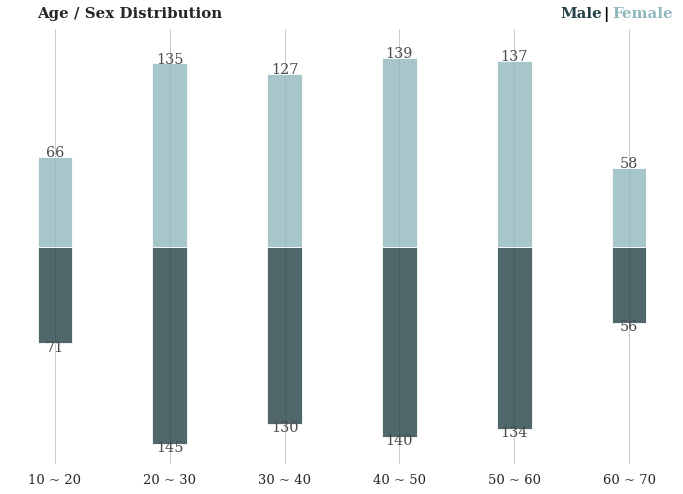

In [19]:
ageSexDistribution()

We can say that there is an equal gender division by age.

In [20]:
def ageSexDistribution2():
    
    # Order for plotting categorical vars
    ab_order = ['10 ~ 20', '20 ~ 30', '30 ~ 40','40 ~ 50','50 ~ 60' ,'60 ~ 70']

    dataPrepro = dataCopy['age_band'].value_counts()[ab_order]

    color_map = ['#d4dddd' for _ in range(9)]
    color_map[1] = '#244747' 

    fig, ax = plt.subplots(1,1, figsize=(9, 6))
    ax.bar(dataPrepro.index, dataPrepro, width=0.5, 
           edgecolor='darkgray',
           linewidth=0.6,color=color_map)


    #annotations
    for i in dataPrepro.index:
        ax.annotate(f"{dataPrepro[i]}", 
                       xy=(i, dataPrepro[i] + 3), #i like to change this to roughly 5% of the highest cat
                       va = 'center', ha='center',fontweight='light', fontfamily='serif')

    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)



    ax.set_xticklabels(dataPrepro.index, fontfamily='serif', rotation=0)

    # Title and sub-title

    fig.text(0.09, 1, 'Distribution by age band', fontsize=15, fontweight='bold', fontfamily='serif')
    fig.text(0.09, 0.95, 'The age group with the highest number was highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

    fig.text(1.085, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

    fig.text(1.085, 0.815, '''
    The two most common age groups are 20-30.
    and 40-50. It can be said that it is close and 
    balanced to other ages in the 50-60 and 30-40 age range.

    '''
             , fontsize=12, fontweight='light', fontfamily='serif')

    ax.grid(axis='y', linestyle='-', alpha=0.4)   

    grid_y_ticks = np.arange(0, 301, 50) # y ticks, min, max, then step
    ax.set_yticks(grid_y_ticks)
    ax.set_axisbelow(True)

    #Axis labels

    plt.xlabel("Age banding", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)


    # thicken the bottom line if you want to
    plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

    l1 = lines.Line2D([1.05, 1.05], [0, 1.05], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
    fig.lines.extend([l1])


    plt.show()

Let's observe how other features differ by sex.

In [21]:
def visualizationSex():
    sns.set(font_scale=1.2)
    sns.set_style("whitegrid")

    df = pd.DataFrame(dataCopy.groupby(["sex","smoker"]).smoker.count()).rename(columns = {'smoker':'smokerCount'}).reset_index()

    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(12, 10))

    ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
    ax1 = sns.barplot(dataCopy.groupby('sex').age.mean().index,
                      dataCopy.groupby('sex').age.mean().values,
                      palette='Set2')
    ax1.set_title("Sex - Mean Age Graph",fontweight='bold', fontfamily='serif')
    ax1.set_xlabel("Sex",fontweight='light', fontfamily='serif')
    ax1.set_ylabel("Age Average",fontweight='light', fontfamily='serif')

    ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
    ax2 = sns.barplot(dataCopy.groupby('sex').bmi.mean().index,
                      dataCopy.groupby('sex').bmi.mean().values,
                      palette='ch:.25')
    ax2.set_title("Sex - Bmi Graph",fontweight='bold', fontfamily='serif')
    ax2.set_xlabel("Sex",fontweight='light', fontfamily='serif')
    ax2.set_ylabel("Bmi Average",fontweight='light', fontfamily='serif')

    ax3 = fig.add_subplot(gs[1, 0]) 
    ax3 = sns.barplot(dataCopy.groupby('sex').charges.mean().index,
                      dataCopy.groupby('sex').charges.mean().values,
                      palette='Pastel1')
    ax3.set_title("Sex - Charges Graph",fontweight='bold', fontfamily='serif')
    ax3.set_xlabel("Sex",fontweight='light', fontfamily='serif')
    ax3.set_ylabel("Charges Average",fontweight='light', fontfamily='serif')

    ax4 = fig.add_subplot(gs[1, 1]) # row 1, span all columns
    ax4 = sns.barplot(data=df, x="sex", y="smokerCount", hue="smoker",palette='coolwarm')
    ax4.set_title("Sex - Smoker Graph",fontweight='bold', fontfamily='serif')
    ax4.set_xlabel("Sex",fontweight='light', fontfamily='serif')
    ax4.set_ylabel("Smoker Count",fontweight='light', fontfamily='serif')

    sns.despine()

    # useful for adjusting space between subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3) 

    fig.text(0.09, 0.955, 'Analysis of sex by other features', fontsize=16, fontweight='bold', fontfamily='serif')

    fig.text(1.020, 0.955, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

    fig.text(1.020, 0.600, '''
    The mean age of male and female patients is almost equal
    and is approximately 39.

    The bmi value of male and female patients is almost equal
    and its value is 30.That is, it can be said that both sexs are 
    obese.

    On average, it is seen that male patients have higher
    charges.

    The number of non-smokers is much higher for both sexes
    than the number of smokers.It is seen that the number of
    male smokers is higher than the number of female smokers.
    Could this be why men pay a higher average wage?
    ''', fontsize=12, fontweight='light', fontfamily='serif')

    l1 = lines.Line2D([1.00, 1.00], [0, 1.00], transform=fig.transFigure, figure=fig,color='darkblue',lw=0.2)
    fig.lines.extend([l1])

    plt.show()

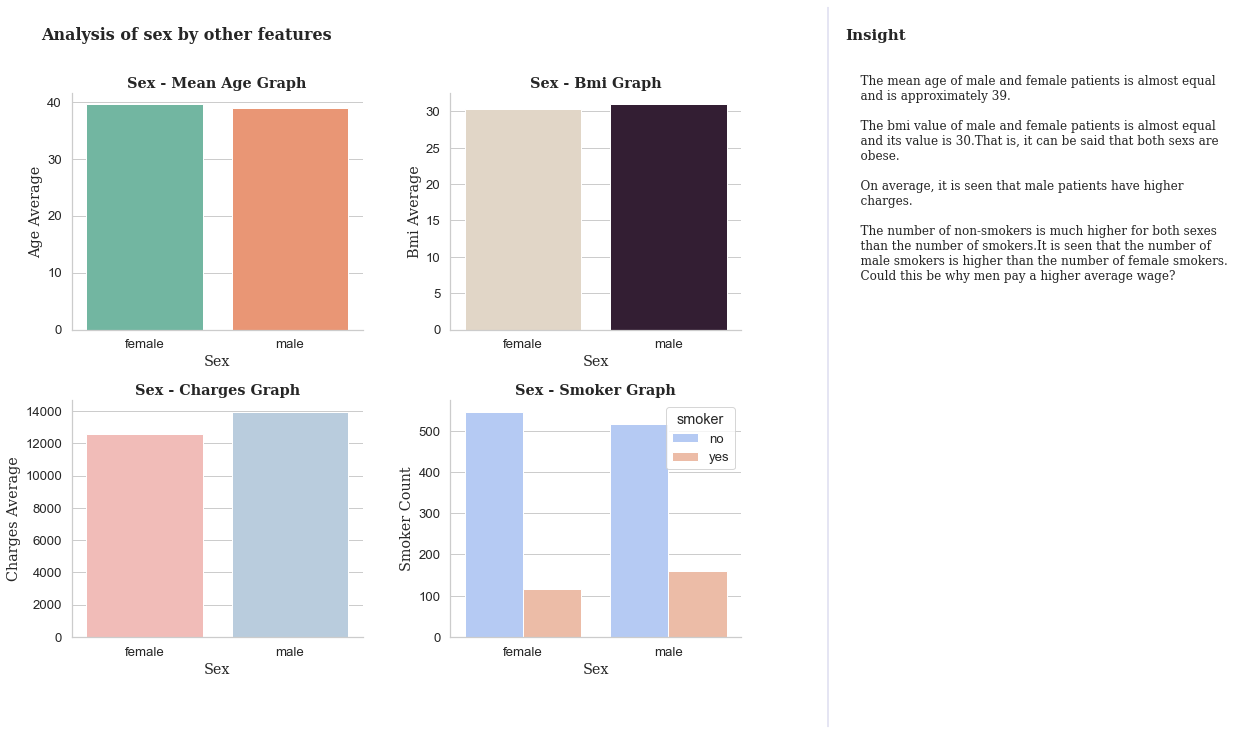

In [22]:
visualizationSex()

### 4.5 Examination of BMI Feature, Region Feature and Smoker Feature

We examined the relationships between BMI and other variables. We found that the BMI values of women and men were almost the same. Now let's compare the BMI indexes of the regions and show the distribution of the region.

In [25]:
def visualizationRegion():
    gs = gridspec.GridSpec(1, 3)
    fig = plt.figure(figsize=(14, 5))

    ax1 = fig.add_subplot(gs[0, 0]) 
    patches, texts, autotexts = ax1.pie(dataCopy["region"].value_counts().values, labels = dataCopy["region"].value_counts().index, 
                       autopct='%.1f%%')
    ax1.set(aspect="equal", title='Region Distribution')

    ax2 = fig.add_subplot(gs[0, 1]) 
    ax2 = sns.barplot(dataCopy.groupby('region').bmi.mean().index,
                      dataCopy.groupby('region').bmi.mean().values,
                      palette='ch:.25')
    for item in ax2.get_xticklabels():
        item.set_rotation(30)

    ax2.set_title("Region - Bmi Graph")
    ax2.set_ylabel("Bmi Average",fontweight='light')

    ax3 = fig.add_subplot(gs[0, 2]) 
    ax3 = sns.barplot(data=dataCopy, x="smoker", y="bmi", hue="region",palette="Set2")
    ax3.set_title("Region - Smoker - Bmi Graph")
    ax3.set_ylabel("Bmi Average")

    sns.despine()

    # useful for adjusting space between subplots
    plt.subplots_adjust(wspace=0.4) 

    fig.text(0.09, 0.95, 'Analysis of region by other features', fontsize=16, fontweight='bold', fontfamily='serif')
    fig.text(0.09, -0.2, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
    fig.text(0.09, -0.6, '''
    We can see that the patients are the majority in the Southeast region and almost equally in the other regions.

    Patients in the Southeast region appear to be fatter.

    There is almost no difference between the mean BMI values for smoking status and the mean BMI for non-smoking patients in the
    regions. As in the correlation heatmap, there is no relationship between smoking and bmi value and region characteristics.

    ''', fontsize=13, fontweight='light', fontfamily='serif')

    l1 = lines.Line2D([0.08, 1.00], [-0.10, -0.10], transform=fig.transFigure, figure=fig,color='darkblue',lw=0.1)
    fig.lines.extend([l1])

    plt.show()

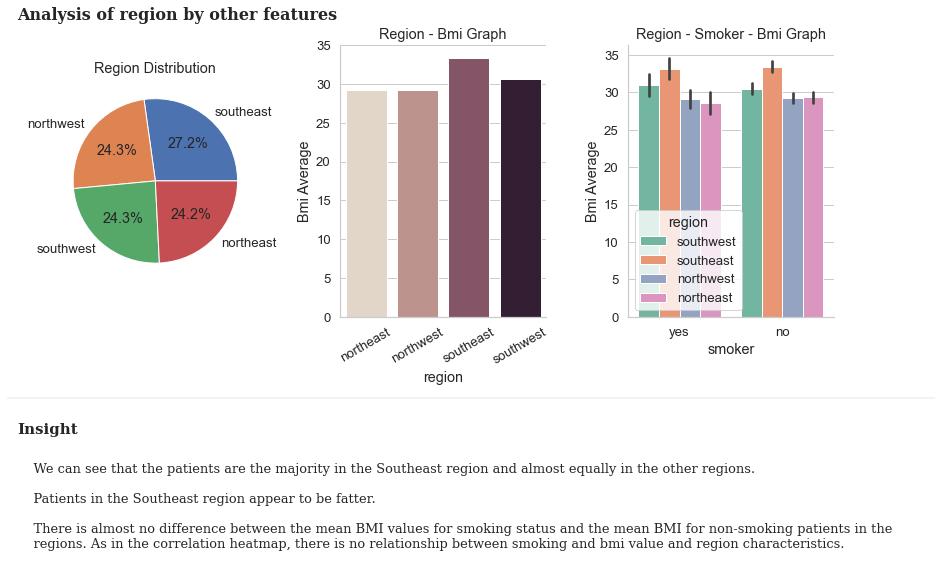

In [26]:
visualizationRegion()

<a id = "17"></a><br>
## Veri Ön İşleme

<a id = "18"></a><br>
### Kategorik Verilerin Dönüşümü

* `sex`,`smoker`,`region` değişkenlerini Makine Öğrenmesi için kullanılacak fonksiyonların değişken sonuçlarını anlaması için endcod edelim.

    * sex = `female`:0 , `male`:1 
    * smoker = `no`:0 , `yes`:1
    * region = `northeast`:0,`northwest`:1,`southeast`:2,`southwest`:3

In [ ]:
objectColList = data.select_dtypes(include=['object']).columns.to_list()

In [ ]:
le = LabelEncoder()
for col in objectColList:
    data[col] = le.fit_transform(data[col])
data

<a id = "19"></a><br>
### Train-Test Split

In [ ]:
X = data.iloc[:,:-1].values
y = data["charges"].values

In [ ]:
# %80 -%20 şekilde nölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id = "20"></a><br>
### Veri Setini Ölçekleme

* Ölçekleme, veri setindeki verilerin dağılımını değiştirmeden verileri belirli değerler arasına sıkıştırmaktadır. 

In [ ]:
data.columns

In [ ]:
# Bazı sütunların orijinal ve ölçeklenmiş halini görüntüleyelim
columnListe = ['age','bmi','charges']

In [ ]:
scaler = StandardScaler()

In [ ]:
for i in columnListe:
    
    scaled_data = scaler.fit_transform(data[i].values.reshape(-1,1))
    
    # şimdi de şekli çizdirerek kaşılaştıralım
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(data[i].values, ax = ax[0],color = "gray")
    ax[0].set_title(f"{i}-Original Data")
    sns.distplot(scaled_data, ax=ax[1],color = "green")
    ax[1].set_title(f"{i}-Scaled Data")

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
# X_train ve X_test için dönüşüm gerçekleştirelim.
scaling_x_train = scaler.fit_transform(X_train)
scaling_x_test = scaler.fit_transform(X_test)

In [ ]:
scaling_x_train.shape

<a id = "21"></a><br>
## Model Seçme 

Multi linear,lasso regresyon, ElasticNet, KNN, SVR,CART, Random Forest, XGBoost, 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(scaling_x_train, y_train)
y_test_hat = clf.predict(scaling_x_test)

from sklearn.metrics import median_absolute_error
mean_squared_error(y_test_hat, y_test)

In [ ]:
median_absolute_error(clf.predict(scaling_x_train), y_train)

In [ ]:
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=5)

# scores = []
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     scores.append(
#         median_absolute_error(clf.fit(X_train, y_train).predict(X_test), y_test)
#     )
    
# np.mean(scores)

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
# cross_val_scores = cross_val_score(RandomForestRegressor(max_depth=1, n_estimators=100, random_state=1),\
#                                    X_train, y_train, scoring='neg_mean_squared_error', cv=50)

# # change neg_mean_squared error to mean_squared_error
# cross_val_scores = np.sqrt(np.abs(cross_val_scores)) 
# print(cross_val_scores)
# print("mean:", np.mean(cross_val_scores))

In [ ]:
scaling_x_train.shape,y_train.shape

In [ ]:
random_forest = RandomForestRegressor(max_depth=50, n_estimators=100, random_state=1)
random_forest.fit(scaling_x_train, y_train)
root_mean_squared_error = np.sqrt(mean_squared_error(y_train, random_forest.predict(scaling_x_train)))
root_mean_squared_error

---